In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://storage.dosm.gov.my/cpi/cpi_2d_state.csv')

In [3]:
df

,state,date,division,index
0,Johor,2010-01-01,overall,99.4
1,Johor,2010-02-01,overall,99.4
2,Johor,2010-03-01,overall,99.4
3,Johor,2010-04-01,overall,99.4
4,Johor,2010-05-01,overall,99.6
...,...,...,...,...
42779,W.P. Putrajaya,2025-07-01,13,133.7
42780,W.P. Putrajaya,2025-08-01,13,134.0
42781,W.P. Putrajaya,2025-09-01,13,135.1
42782,W.P. Putrajaya,2025-10-01,13,138.0


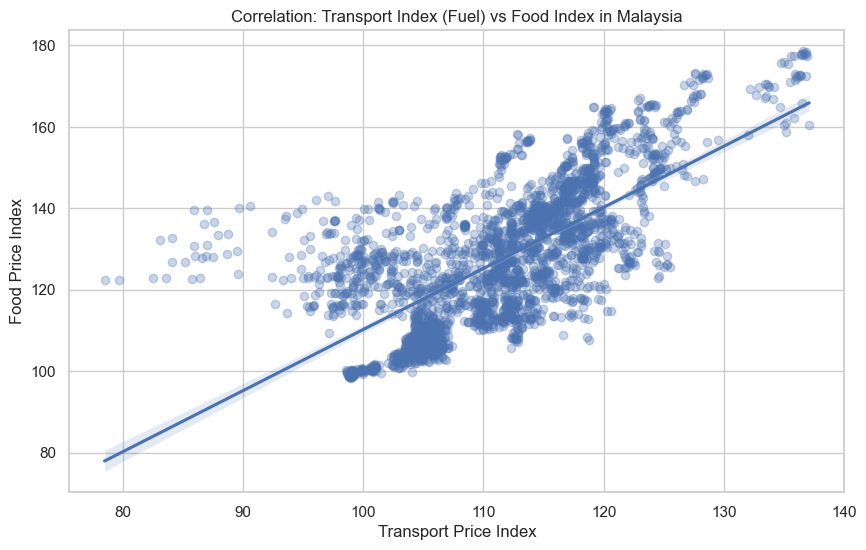

In [5]:
df_pivot = df.pivot_table(index=['state', 'date'], columns='division', values='index').reset_index()

# Create a regression plot to show the correlation
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(data=df_pivot, x='07', y='01', scatter_kws={'alpha':0.3}) # 07=Transport, 01=Food
plt.title("Correlation: Transport Index (Fuel) vs Food Index in Malaysia")
plt.xlabel("Transport Price Index")
plt.ylabel("Food Price Index")
plt.show()

In [6]:
import plotly.express as px

# Mock Data for household weights (B40 vs T20)
impact_data = {
    'Tier': ['B40', 'B40', 'M40', 'M40', 'T20', 'T20'],
    'Category': ['Food', 'Transport', 'Food', 'Transport', 'Food', 'Transport'],
    'Expenditure_Weight': [0.35, 0.10, 0.25, 0.15, 0.15, 0.20], # B40 spends more % on food
    'Price_Increase': [0.05, 0.20, 0.04, 0.20, 0.02, 0.20] # Simulated 20% fuel hike
}
df_sim = pd.DataFrame(impact_data)
df_sim['Total_Budget_Impact'] = df_sim['Expenditure_Weight'] * df_sim['Price_Increase']

fig = px.bar(df_sim, x='Tier', y='Total_Budget_Impact', color='Category',
             title="Impact of Fuel Subsidy Removal on Monthly Household Budget",
             labels={'Total_Budget_Impact': 'Percentage Increase in Expenses'})
fig.show()

In [7]:
df_sim

,Tier,Category,Expenditure_Weight,Price_Increase,Total_Budget_Impact
0,B40,Food,0.35,0.05,0.0175
1,B40,Transport,0.10,0.20,0.0200
2,M40,Food,0.25,0.04,0.0100
3,M40,Transport,0.15,0.20,0.0300
4,T20,Food,0.15,0.02,0.0030
5,T20,Transport,0.20,0.20,0.0400
